In [346]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')


In [347]:
def concat_df(train_data , test_data):
    return pd.concat([train_data , test_data], sort = True).reset_index(drop = True)


# Data Load

In [348]:
df_test = pd.read_csv("D:/바탕 화면/인턴/python/Analyze_practice/kaggle/house-prices-advanced-regression-techniques/data/test.csv")
df_train = pd.read_csv("D:/바탕 화면/인턴/python/Analyze_practice/kaggle/house-prices-advanced-regression-techniques/data/train.csv")
df_all = concat_df(df_test,df_train)
df_price = pd.read_csv("D:/바탕 화면/인턴/python/Analyze_practice/kaggle/house-prices-advanced-regression-techniques/data/sample_submission.csv")

df_test.name = 'Test Set'
df_train.name = 'Training Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

# Data Check

## check Data shape & data features

In [349]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}'.format(df_test.shape[0]))
print('Training X shape = {}'.format(df_train.shape))
print('Training Y shape = {}\n'.format(df_train['SalePrice'].shape[0]))
print('Test X shape = {}'.format(df_test.shape))
print('Test Y shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)



Number of Training Examples = 1460
Number of Test Examples = 1459
Training X shape = (1460, 81)
Training Y shape = 1460

Test X shape = (1459, 80)
Test Y shape = 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', '

In [350]:
df_train.info()
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
205,206,20,RL,99.0,11851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,180500
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400
1082,1083,20,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,192000


In [351]:
df_test.info()
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
107,1568,60,RL,NaN,17082,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1365,2826,20,RL,70.0,10519,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
498,1959,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [352]:
def display_unique(df):
    for col in df.columns.tolist():
        print('{} column values: {}'.format(col,df[col].unique()))
    print('\n')


In [353]:
for df in dfs:
    print(df.name)
    display_unique(df)

Training Set
Id column values: [   1    2    3 ... 1458 1459 1460]
MSSubClass column values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning column values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage column values: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea column values: [ 8450  9600 11250 ... 17217 13175  9717]
Street column values: ['Pave' 'Grvl']
Alley column values: [nan 'Grvl' 'Pave']
LotShape column values: ['Reg' 'IR1' 'IR2' 'IR3']
Land

LotConfig column values: ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope column values: ['Gtl' 'Mod' 'Sev']
Neighborhood column values: ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Condition1 column values: ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2 column values: ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
BldgType column values: ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle column values: ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
OverallQual column values: [ 5  6  8  7  4  9  2  3 10  1]
OverallCond column values: [6 5 7 8 2 9 3 4 1]
YearBuilt column values: [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 196

  641. 1128. 1381.  264.  996.]
Heating column values: ['GasA' 'GasW' 'Grav' 'Wall']
HeatingQC column values: ['TA' 'Gd' 'Ex' 'Fa' 'Po']
CentralAir column values: ['Y' 'N']
Electrical column values: ['SBrkr' 'FuseA' 'FuseF' 'FuseP']
1stFlrSF column values: [ 896 1329  928  926 1280  763 1187  789 1341  882 1337  483  525  855
  836 1627 1544 1698 1822 2696 1687 1370 1324 1145  744  847 1645 1595
 1218 1468  831 1012 1494 1251 1402 1488  840  600  756  530 1418  975
 1492 1829 1287  930 1232 1209 1510 1131 1728 1929 1019 1128 1604 1480
 1143 1206 1580  832 1064  972  988  985  816 1175 1395 1157  936 1347
  827 1027 1060  868 1030 1160  765  608  848  955  780  548 1068  888
  662 1675  725 1212  942 1832  892  864 1373  720 1483 1117 1052 1074
 1169 1172 1508 1298 1433  964 1222  965 1026  876 1978 1044  640  992
 1196  792 1096  960 1296  856  862  894 1225 1102 1034 1191  540  727
  952 1646 1036 1285 2048 1346 1214 1264 1430 1344  945  546  874  833
 1216  624 1803 1152 1434 1008  9

## check data missing value on all features

In [354]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col,df[col].isnull().sum()))
    print('\n')


for df in dfs:
    print(df.name)
    display_missing(df)    

Training Set
Id column missing values: 0
MSSubClass column missing values: 0
MSZoning column missing values: 0
LotFrontage column missing values: 259
LotArea column missing values: 0
Street column missing values: 0
Alley column missing values: 1369
LotShape column missing values: 0
LandContour column missing values: 0
Utilities column missing values: 0
LotConfig column missing values: 0
LandSlope column missing values: 0
Neighborhood column missing values: 0
Condition1 column missing values: 0
Condition2 column missing values: 0
BldgType column missing values: 0
HouseStyle column missing values: 0
OverallQual column missing values: 0
OverallCond column missing values: 0
YearBuilt column missing values: 0
YearRemodAdd column missing values: 0
RoofStyle column missing values: 0
RoofMatl column missing values: 0
Exterior1st column missing values: 0
Exterior2nd column missing values: 0
MasVnrType column missing values: 8
MasVnrArea column missing values: 8
ExterQual column missing values: 

### visualization missing value in data set

Training Set


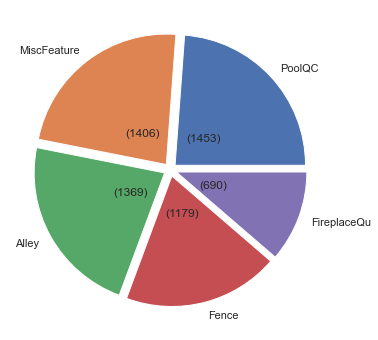

Test Set


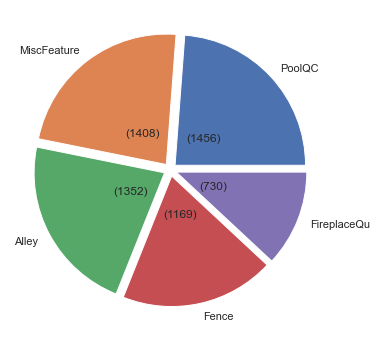

In [355]:
# get number of missing value by feature
def visualization_missing(df):
    num_miss = [] 
    columns_list = [] 
    for col in df.columns.tolist(): 
        if df[col].isnull().sum() > 0:
            num_miss.append(df[col].isnull().sum())
            columns_list.append(col)
    value_dic = [ x for x in zip(num_miss , columns_list)]
    value_dic = sorted(dict(value_dic).items(), reverse = True)

    return value_dic

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '({v:d})'.format(p=pct,v=val)
    return my_autopct

print(df_train.name)
value_dic = visualization_missing(df_train)

value_data = []
label_data = []
count = 5



for i in range (count):
    value_data.append(value_dic[i][0])
    label_data.append(value_dic[i][1])

pie , ax = plt.subplots(figsize = [10,6])
labels = label_data

plt.pie(x = value_data , autopct= make_autopct(value_data),explode = [0.05]*count, labels = label_data , pctdistance = 0.3)

plt.show()

print(df_test.name)
value_dic = visualization_missing(df_test)

value_data = []
label_data = []
count = 5



for i in range (count):
    value_data.append(value_dic[i][0])
    label_data.append(value_dic[i][1])

pie , ax = plt.subplots(figsize = [10,6])
labels = label_data

plt.pie(x = value_data , autopct= make_autopct(value_data),explode = [0.05]*count, labels = label_data , pctdistance = 0.3)

plt.show()

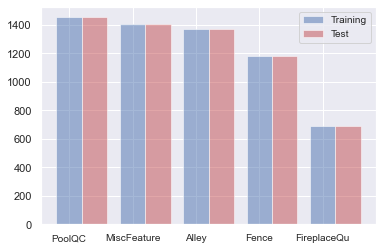

In [356]:
bar_width = 0.4
alpha = 0.5

value_dic = visualization_missing(df_train)

value_data = []
label_data = []
count = 5

for i in range (count):
    value_data.append(value_dic[i][0])
    label_data.append(value_dic[i][1])

index = np.arange(count)
    
p_train = plt.bar(index , value_data , bar_width, color = 'b', alpha = alpha , label = 'Train')

# get number of count missing value in test set by features
value_dic_test = visualization_missing(df_test)

value_data_test = []
label_data_test = []
count = 5

for i in range (count):
    value_data_test.append(value_dic[i][0])
    label_data_test.append(value_dic[i][1])

index = np.arange(count)

p_test = plt.bar(index + bar_width , value_data_test , bar_width , color = 'r' , alpha = alpha , label = 'Test')

#visualization numebr of train,test missing value 
plt.title = ('Missing Value in Train set & Test set')
plt.ylabe = ("Number of missing value")
plt.xlabe = ("Feature")
plt.xticks(index, label_data, fontsize = 10)
plt.legend((p_train[0], p_test[0]),('Training','Test'), fontsize = 10)

    
plt.show()

In [357]:
miss_value = []
x = np.arange(len(df_test.columns)-1)

for miss_num in df_test.columns.tolist():
    miss_value.append(df[miss_num].isnull().sum())
print(miss_value)

[0, 0, 4, 227, 0, 0, 1352, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 16, 15, 0, 0, 0, 44, 45, 44, 42, 1, 42, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 730, 76, 78, 78, 1, 1, 78, 78, 0, 0, 0, 0, 0, 0, 0, 1456, 1169, 1408, 0, 0, 0, 1, 0]


# Preprocessing Missing Value

In [358]:
df_test[df_test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


# Clustering for fix the data which it's missing value
# in MSZoning

In [359]:
non_object = df_test.dtypes[df_test.dtypes != 'object']

In [360]:
non_object

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [361]:
clus_df = df_test[['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                  'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                  '1stFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                  'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                  'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolArea','MiscVal',
                  'MoSold','YrSold']]

In [362]:
display_missing(clus_df)

Id column missing values: 0
MSSubClass column missing values: 0
LotFrontage column missing values: 227
LotArea column missing values: 0
OverallQual column missing values: 0
OverallCond column missing values: 0
YearBuilt column missing values: 0
YearRemodAdd column missing values: 0
MasVnrArea column missing values: 15
BsmtFinSF1 column missing values: 1
BsmtFinSF2 column missing values: 1
BsmtUnfSF column missing values: 1
TotalBsmtSF column missing values: 1
1stFlrSF column missing values: 0
LowQualFinSF column missing values: 0
GrLivArea column missing values: 0
BsmtFullBath column missing values: 2
BsmtHalfBath column missing values: 2
FullBath column missing values: 0
HalfBath column missing values: 0
BedroomAbvGr column missing values: 0
KitchenAbvGr column missing values: 0
TotRmsAbvGrd column missing values: 0
Fireplaces column missing values: 0
GarageYrBlt column missing values: 78
GarageCars column missing values: 1
GarageArea column missing values: 1
WoodDeckSF column missing

In [363]:
clus_df = clus_df.drop(['LotFrontage','GarageYrBlt'],axis = 1)

In [364]:
clus_df['MasVnrArea'].describe()

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

In [365]:
clus_df['MasVnrArea'].value_counts()

0.0      877
176.0     10
144.0      9
120.0      8
216.0      8
        ... 
634.0      1
177.0      1
615.0      1
549.0      1
442.0      1
Name: MasVnrArea, Length: 303, dtype: int64

In [366]:
clus_df['MasVnrArea'] = clus_df['MasVnrArea'].fillna(0)

In [367]:
clus_df["BsmtFinSF2"].describe()
clus_df["BsmtFinSF2"] = clus_df["BsmtFinSF2"].fillna(0)
clus_df['BsmtFinSF1'].describe()
clus_df['BsmtFinSF1'] = clus_df['BsmtFinSF1'].fillna(350.5)
clus_df['BsmtUnfSF'].describe()
clus_df['BsmtUnfSF'] = clus_df['BsmtUnfSF'].fillna(460)
clus_df['TotalBsmtSF'].describe()
clus_df['TotalBsmtSF']= clus_df['TotalBsmtSF'].fillna(988)
clus_df['BsmtFullBath'].describe()
clus_df['BsmtFullBath'] = clus_df['BsmtFullBath'].fillna(0)
clus_df['BsmtHalfBath'].describe()
clus_df['BsmtHalfBath'] = clus_df['BsmtHalfBath'].fillna(0)
clus_df['GarageCars'].describe()
clus_df['GarageCars'] = clus_df['GarageCars'].fillna(1.8)
clus_df['GarageArea'].describe()
clus_df['GarageArea'] = clus_df['GarageArea'].fillna(480)


In [368]:
display_missing(clus_df)

Id column missing values: 0
MSSubClass column missing values: 0
LotArea column missing values: 0
OverallQual column missing values: 0
OverallCond column missing values: 0
YearBuilt column missing values: 0
YearRemodAdd column missing values: 0
MasVnrArea column missing values: 0
BsmtFinSF1 column missing values: 0
BsmtFinSF2 column missing values: 0
BsmtUnfSF column missing values: 0
TotalBsmtSF column missing values: 0
1stFlrSF column missing values: 0
LowQualFinSF column missing values: 0
GrLivArea column missing values: 0
BsmtFullBath column missing values: 0
BsmtHalfBath column missing values: 0
FullBath column missing values: 0
HalfBath column missing values: 0
BedroomAbvGr column missing values: 0
KitchenAbvGr column missing values: 0
TotRmsAbvGrd column missing values: 0
Fireplaces column missing values: 0
GarageCars column missing values: 0
GarageArea column missing values: 0
WoodDeckSF column missing values: 0
OpenPorchSF column missing values: 0
EnclosedPorch column missing v

In [369]:
clus_df.drop(['Id'],axis = 1 , inplace = True)

### Min Max Normalization for fit scale to clustring

In [370]:
clus_df_nom = (clus_df - clus_df.describe().min())  / (clus_df.describe().max() - clus_df.describe().min())

In [371]:
clus_df_nom

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.184309,0.002743,0.003429,0.975248,0.975363,0.000000,0.116708,0.094364,0.126168,...,0.095956,0.000000,0.0,0.0,0.082248,0.0,0.0,0.000000,0.003429,1.000000
1,0.000000,0.232277,0.003429,0.003429,0.973732,0.973854,0.074023,0.230175,0.000000,0.189720,...,0.269363,0.024674,0.0,0.0,0.000000,0.0,0.0,0.735294,0.003429,1.000000
2,0.027797,0.224352,0.002743,0.002743,0.993433,0.993966,0.000000,0.197257,0.000000,0.064019,...,0.145305,0.023304,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001372,1.000000
3,0.027797,0.154495,0.003429,0.003429,0.993938,0.993966,0.013708,0.150125,0.000000,0.151402,...,0.246744,0.024674,0.0,0.0,0.000000,0.0,0.0,0.000000,0.003429,1.000000
4,0.069493,0.064308,0.004801,0.002743,0.990907,0.990950,0.000000,0.065586,0.000000,0.475234,...,0.000000,0.056203,0.0,0.0,0.098698,0.0,0.0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.097290,0.008651,0.002058,0.004115,0.979794,0.979888,0.000000,0.000000,0.000000,0.255140,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.003429,0.998009
1455,0.097290,0.007889,0.002058,0.002743,0.979794,0.979888,0.000000,0.062843,0.000000,0.137383,...,0.000000,0.016450,0.0,0.0,0.000000,0.0,0.0,0.000000,0.002058,0.998009
1456,0.000000,0.336247,0.002743,0.004115,0.974742,0.992961,0.000000,0.305237,0.000000,0.000000,...,0.324880,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005487,0.998009
1457,0.045170,0.162891,0.002743,0.002743,0.990907,0.990950,0.000000,0.084040,0.000000,0.268692,...,0.054832,0.021933,0.0,0.0,0.000000,0.0,0.0,0.041176,0.004115,0.998009


### Standardization for fit scale to clustring

In [372]:
from sklearn import preprocessing

name = clus_df.columns

scaler = preprocessing.StandardScaler()

clus_df_std = scaler.fit_transform(clus_df)
clus_df_std = pd.DataFrame(clus_df_std, columns = name)

In [373]:
clus_df_std

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold
0,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,-0.650461,...,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.057227,-0.092244,-0.038281,1.713905
1,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,-0.339225,...,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,19.730438,-0.038281,1.713905
2,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,...,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-1.140614,1.713905
3,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,...,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.038281,1.713905
4,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,1.059048,...,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.057227,-0.092244,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965230,-0.297689,-0.018835,...,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.038281,-1.359958
1455,2.401505,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411338,-0.297689,-0.595537,...,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.773170,-1.359958
1456,-0.874711,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725105,-0.297689,-1.268355,...,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,1.064053,-1.359958
1457,0.646389,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.563316,-0.224509,-0.297689,0.047531,...,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,1.017827,0.329164,-1.359958


## K means Clustering (k = 4) 

### with nomalization

In [374]:
from sklearn.mixture import GaussianMixture

nclusters = 4

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(clus_df_nom)

y_cluster_gmm = gmm.predict(clus_df_nom)

clus_df_nom['cluster'] = y_cluster_gmm

clus_df_nom.sample(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold,cluster
1384,0.000000,0.104115,0.002743,0.004801,0.980804,0.980894,0.000000,0.108978,0.000000,0.199533,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.001372,0.998009,2
942,0.048645,0.130738,0.002743,0.002743,0.978784,0.978882,0.000000,0.000000,0.000000,0.728972,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002743,0.998506,2
908,0.069493,0.070202,0.004801,0.002743,0.997979,0.998492,0.000000,0.000000,0.000000,0.724299,...,0.069911,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.004115,0.998506,2
1391,0.027797,0.177563,0.004115,0.002743,0.993938,0.993966,0.155586,0.198504,0.000000,0.120561,...,0.057574,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002743,0.998009,2
70,0.020848,0.060590,0.002058,0.002743,0.944433,0.971843,0.528444,0.011970,0.000000,0.308879,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,2
1250,0.041696,0.233420,0.004115,0.002058,0.981815,0.981899,0.099383,0.255112,0.325688,0.106542,...,0.068540,0.000000,0.0,0.0,0.548321,0.548321,0.000000,0.000000,0.998009,0
189,0.000000,0.101177,0.002058,0.003429,0.979794,0.979888,0.000000,0.181047,0.000000,0.064486,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.005487,0.999502,2
1289,0.000000,0.220181,0.002743,0.003429,0.972217,0.972346,0.000000,0.035910,0.597641,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.038235,0.006859,0.998009,1
332,0.000000,0.182097,0.003429,0.002058,0.978279,0.978380,0.000000,0.217456,0.039318,0.050467,...,0.000000,0.106923,0.0,0.0,0.000000,0.000000,0.000000,0.002743,0.999502,1
521,0.069493,0.086705,0.004801,0.002743,0.997979,0.998492,0.120631,0.210973,0.000000,0.231776,...,0.023989,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.003429,0.999004,2


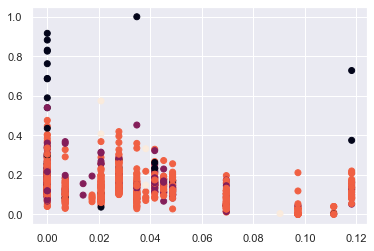

In [375]:
plt.scatter(x = clus_df_nom.iloc[:,0] ,
            y = clus_df_nom.iloc[:,1] ,
            c = y_cluster_gmm)
plt.show()

In [376]:
clus_df_nom[clus_df_nom['cluster'] == 1]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold,cluster
0,0.000000,0.184309,0.002743,0.003429,0.975248,0.975363,0.000000,0.116708,0.094364,0.126168,...,0.000000,0.000000,0.0,0.082248,0.0,0.0,0.000000,0.003429,1.000000,1
6,0.000000,0.118260,0.003429,0.004115,0.990907,0.998492,0.000000,0.233167,0.000000,0.108879,...,0.014393,0.000000,0.0,0.000000,0.0,0.0,0.029412,0.001372,1.000000,1
9,0.000000,0.125877,0.002058,0.002743,0.979794,0.979888,0.000000,0.200499,0.051114,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.002058,1.000000,1
32,0.000000,0.253006,0.003429,0.003429,0.981815,0.995978,0.171350,0.031421,0.562910,0.104206,...,0.000000,0.127485,0.0,0.000000,0.0,0.0,0.000000,0.002058,1.000000,1
33,0.027797,0.211893,0.004801,0.002743,0.991412,0.991452,0.345442,0.062344,0.642857,0.000000,...,0.089102,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.003429,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.006949,0.197802,0.001372,0.002743,0.967165,0.969832,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.015764,0.0,0.000000,0.0,0.0,0.000000,0.006173,0.998009,1
1441,0.000000,0.120400,0.003429,0.002743,0.994948,0.994972,0.000000,0.283292,0.076016,0.060280,...,0.118574,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006173,0.998009,1
1444,0.000000,0.540269,0.000000,0.001372,0.970196,0.970335,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.092529,0.0,0.000000,0.0,0.0,0.000000,0.002743,0.998009,1
1451,0.000000,0.216264,0.002743,0.002743,0.979289,0.984413,0.132968,0.029676,0.225426,0.299533,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.002743,0.998009,1


In [377]:
clus_df_nom.loc[[455,756,790,1444]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold,cluster
455,0.006949,0.368528,0.000686,0.002058,0.949485,0.969832,0.0,0.0,0.0,0.000000,...,0.01645,0.000000,0.0,0.0,0.0,0.0,0.0,0.001372,0.999502,1
756,0.000000,0.238026,0.000000,0.002743,0.970701,0.970838,0.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000686,0.999004,1
790,0.034746,1.000000,0.002743,0.000000,0.944433,0.969832,0.0,0.0,0.0,0.320561,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.999004,0
1444,0.000000,0.540269,0.000000,0.001372,0.970196,0.970335,0.0,0.0,0.0,0.000000,...,0.00000,0.092529,0.0,0.0,0.0,0.0,0.0,0.002743,0.998009,1


In [378]:
df_train_clus_nom = pd.concat([df_train,clus_df_nom['cluster']],axis = 1)

In [379]:
df_train_clus_nom['cluster'].fillna(1)

0       1.0
1       0.0
2       2.0
3       2.0
4       2.0
       ... 
1455    2.0
1456    2.0
1457    1.0
1458    2.0
1459    1.0
Name: cluster, Length: 1460, dtype: float64

In [380]:
mean_clus_1 = df_train_clus_nom[df_train_clus_nom['cluster'] == 1]

In [381]:
mean_clus_1['MSZoning'].value_counts()

RL         190
RM          35
FV          14
C (all)      2
RH           1
Name: MSZoning, dtype: int64

### with standardization

In [382]:
from sklearn.mixture import GaussianMixture

nclusters = 4

gmm_std = GaussianMixture(n_components=nclusters)
gmm_std.fit(clus_df_std)

y_cluster_gmm_std = gmm_std.predict(clus_df_std)

clus_df_std['cluster'] = y_cluster_gmm_std

clus_df_std.sample(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold,cluster
715,-0.874711,1.017566,1.337571,-0.497418,1.008643,0.915448,0.793067,2.415273,-0.297689,-0.719116,...,-0.193348,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.038281,0.176974,3
1223,0.061351,0.084145,1.337571,-0.497418,0.745309,0.536718,2.268134,-0.129995,0.653408,0.429711,...,0.677988,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.038281,-1.359958,2
300,-0.874711,0.137437,-0.751101,-0.497418,-0.242194,-0.930861,0.250514,1.228360,-0.297689,-0.595537,...,-0.236915,-0.360738,-0.088827,1.324176,-0.057227,-0.057227,-0.092244,0.329164,0.945440,2
313,0.763397,-0.068061,-0.751101,-1.395602,-0.439695,-1.214908,3.149784,-0.965230,-0.297689,3.001984,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,2.166387,0.945440,3
1287,0.529382,-0.427783,-0.751101,1.298950,-0.505528,-1.309591,-0.563316,-0.369576,-0.297689,-1.199700,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,1.064053,-1.359958,3
1137,0.061351,0.399861,0.641347,-0.497418,1.041560,0.962789,-0.032066,0.718428,-0.297689,-0.453650,...,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,0.329164,-0.591492,3
1342,0.763397,0.265823,-0.054877,-0.497418,-0.242194,-0.930861,-0.563316,-0.965230,-0.297689,3.127851,...,1.912381,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,0.329164,-1.359958,3
1413,-0.172665,0.216164,-0.751101,-0.497418,-1.098030,-1.593638,-0.563316,1.078897,-0.297689,-0.975428,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,0.329164,-1.359958,3
714,0.061351,-0.020017,2.033795,-0.497418,0.975726,0.868107,0.193998,1.659166,-0.297689,-0.895330,...,0.982956,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-1.875504,0.176974,3
1305,-0.172665,0.469302,-1.447325,0.400766,-0.703029,-1.593638,-0.563316,0.034854,-0.297689,-0.227088,...,-0.701628,2.139086,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,1.064053,-1.359958,3


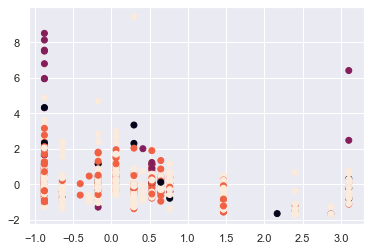

In [383]:
plt.scatter(x = clus_df_std.iloc[:,0] ,
            y = clus_df_std.iloc[:,1] ,
            c = y_cluster_gmm_std)
plt.show()

In [384]:
clus_df_std[clus_df_std['cluster'] == 3]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold,cluster
2,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-1.140614,1.713905,3
3,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.038281,1.713905,3
5,0.061351,0.036505,-0.054877,-0.497418,0.712392,0.489377,-0.563316,-0.965230,-0.297689,0.477769,...,0.518243,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.773170,1.713905,3
6,-0.874711,-0.371261,-0.054877,1.298950,0.679475,1.104813,-0.563316,1.089887,-0.297689,-0.735135,...,-0.396660,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,0.700664,-1.140614,1.713905,3
7,0.061351,-0.286074,-0.054877,-0.497418,0.876976,0.678742,-0.563316,-0.965230,-0.297689,0.537270,...,0.387543,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.405725,1.713905,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2.401505,-1.674095,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.965230,-0.297689,-0.018835,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.038281,-1.359958,3
1454,2.401505,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965230,-0.297689,-0.018835,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.038281,-1.359958,3
1455,2.401505,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411338,-0.297689,-0.595537,...,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.773170,-1.359958,3
1456,-0.874711,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725105,-0.297689,-1.268355,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,1.064053,-1.359958,3


In [385]:
clus_df_std.loc[[455,756,790,1444]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolArea,MiscVal,MoSold,YrSold,cluster
455,-0.640695,2.414468,-2.839774,-1.395602,-2.019700,-1.593638,-0.563316,-0.96523,-0.297689,-1.268355,...,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-1.140614,0.945440,3
756,-0.874711,0.961852,-3.535998,-0.497418,-0.637196,-1.498956,-0.563316,-0.96523,-0.297689,-1.268355,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-1.508059,0.176974,3
790,0.295366,9.443389,-0.751101,-4.090153,-2.348867,-1.593638,-0.563316,-0.96523,-0.297689,0.301555,...,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-1.875504,0.176974,3
1444,-0.874711,4.326125,-3.535998,-2.293785,-0.670112,-1.546297,-0.563316,-0.96523,-0.297689,-1.268355,...,-0.701628,1.648049,-0.088827,-0.301543,-0.057227,-0.057227,-0.092244,-0.405725,-1.359958,0


In [386]:
df_train_clus_std = pd.concat([df_train,clus_df_std], axis = 1)

In [387]:
std_clus_0 = df_train_clus_std[df_train_clus_std['cluster'] == 0]

In [388]:
std_clus_0['MSZoning'].value_counts()

RL    30
RM     8
RH     1
FV     1
Name: MSZoning, dtype: int64

In [389]:
std_clus_1 = df_train_clus_std[df_train_clus_std['cluster'] == 1]

In [390]:
std_clus_1['MSZoning'].value_counts()

RL    46
RM     4
FV     3
Name: MSZoning, dtype: int64

# Corrilation for get a MSzoing missing value

In [402]:
df_all['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [403]:
df_all[df_all['MSZoning'] == 'C (all)']

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
98,942,942,0,NaN,4,1Fam,TA,No,73.0,0.0,...,WD,0,Pave,7,707.0,AllPub,0,1907,1950,2010
142,952,0,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Grvl,5,756.0,AllPub,0,1896,1950,2010
359,816,0,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,5,624.0,AllPub,0,1910,1950,2009
362,797,0,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,5,245.0,AllPub,0,1900,1950,2009
453,572,0,0,Grvl,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,4,572.0,AllPub,0,1925,1950,2009
757,825,536,0,NaN,2,1Fam,Fa,No,0.0,0.0,...,WD,0,Pave,6,173.0,AllPub,0,1895,1950,2008
758,671,378,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,5,356.0,AllPub,0,1910,2000,2008
759,432,432,0,NaN,3,1Fam,Fa,Mn,0.0,0.0,...,WD,0,Grvl,5,592.0,AllPub,0,1920,1950,2008
1119,1034,957,0,NaN,4,2fmCon,TA,No,0.0,0.0,...,WD,0,Pave,9,957.0,AllPub,0,1895,2006,2007
1120,1073,0,0,NaN,3,1Fam,TA,No,967.0,0.0,...,WD,0,Pave,6,1073.0,AllPub,0,1957,1980,2007


In [401]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_all['MSZoning'] = le.fit(df_all['MSZoning'])
df_all['MSZoning']


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [394]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'MSZoning']

In [398]:
df_all_corr[df_all_corr['Feature 1'] == 'LotArea']

,Feature 1,Feature 2,Correlation Coefficient
17,LotArea,LotArea,1.000000
121,LotArea,LotFrontage,0.489896
224,LotArea,1stFlrSF,0.332460
273,LotArea,GrLivArea,0.284519
297,LotArea,SalePrice,0.263843
303,LotArea,Fireplaces,0.261185
321,LotArea,TotalBsmtSF,0.254138
398,LotArea,TotRmsAbvGrd,0.213802
401,LotArea,GarageArea,0.213251
414,LotArea,MSSubClass,0.201730
